# Heart Disease Classification Using Random Forest

In [ ]:
!date

Wed Dec 30 04:15:04 UTC 2020


In [ ]:
!wget https://www.dropbox.com/s/j7gemy8uf4fki00/heart.csv

--2020-12-30 04:15:07--  https://www.dropbox.com/s/j7gemy8uf4fki00/heart.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/j7gemy8uf4fki00/heart.csv [following]
--2020-12-30 04:15:07--  https://www.dropbox.com/s/raw/j7gemy8uf4fki00/heart.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc95d88f5520dcb90e2e8be2af80.dl.dropboxusercontent.com/cd/0/inline/BGDWvX4qKuSlRpf2Ah1eqI1obS_o0ZcEa8rFpjG-05nSXwNz8EKIBLPBNpqim2qRMMPjffilqtLj6y9mZcpGLqdRF-ZlTJS3jLOL71E-kxQdAxcJUpIAX7ud60j-ga0qUpU/file# [following]
--2020-12-30 04:15:08--  https://uc95d88f5520dcb90e2e8be2af80.dl.dropboxusercontent.com/cd/0/inline/BGDWvX4qKuSlRpf2Ah1eqI1obS_o0ZcEa8rFpjG-05nSXwNz8EKIBLPBNpqim2qRMMPjffilqtLj6y9mZcpGLqdRF-ZlTJS3jLOL71E-kxQdAxcJUpIAX7ud

In [ ]:
!head heart.csv

﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [ ]:
import pandas as pd
df = pd.read_csv('heart.csv', sep=',')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


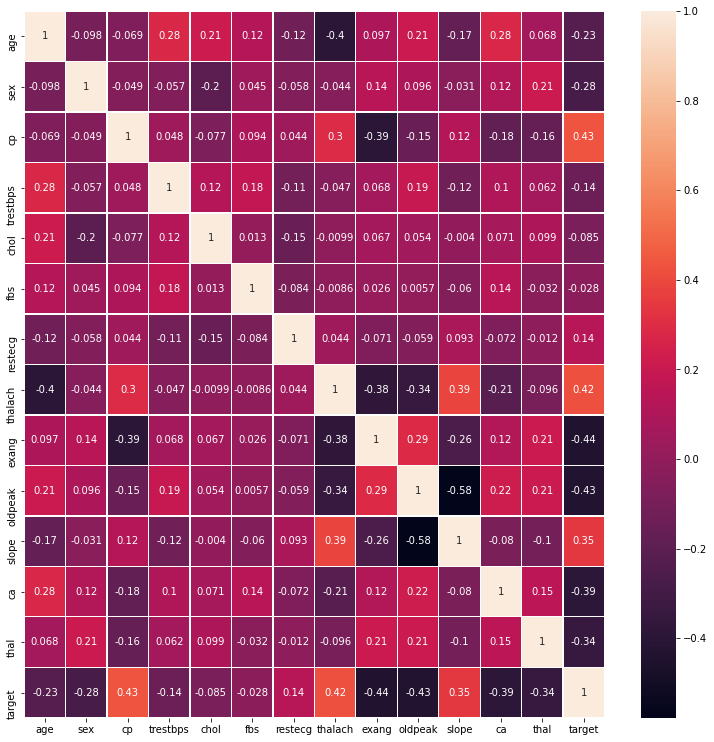

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.3, ax=ax)

In [ ]:
# Categorical Variables: sex,cp, fbs,restecg,exang,slope,ca,thal,target
# Numerical Variables: trestbps, chol,thalach, oldpeak

In [ ]:
import pandas_profiling
import numpy as np

In [ ]:
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df['age'].describe(include='all')

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
result = df.groupby(['age'], as_index=False).agg(num_record=('age', 'count') ).sort_values(['age'])

In [ ]:
result.head()

,age,num_record
0,29,1
1,34,2
2,35,4
3,37,2
4,38,3


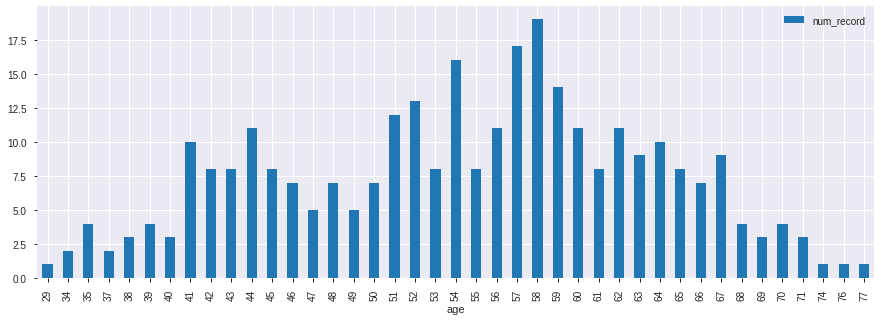

In [ ]:
result.plot(x="age", y="num_record", kind="bar", figsize=(15,5))

In [ ]:
df['chol'].describe(include='all')

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [ ]:
result = df.groupby(['chol'], as_index=False) \
        .agg(num_record=('chol', 'count')) \
        .sort_values(['chol'])

In [ ]:
result.head()

,chol,num_record
0,126,1
1,131,1
2,141,1
3,149,2
4,157,1


In [ ]:
result.count()

chol          152
num_record    152
dtype: int64

In [ ]:
result['num_record'].describe()

count    152.000000
mean       1.993421
std        1.130532
min        1.000000
25%        1.000000
50%        2.000000
75%        2.250000
max        6.000000
Name: num_record, dtype: float64

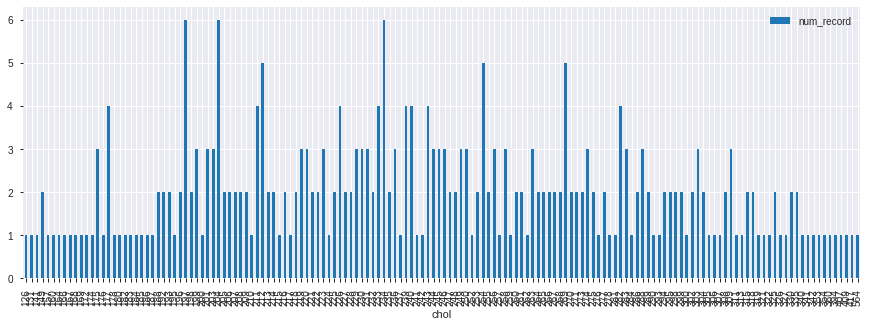

In [ ]:
result.plot(x="chol", y="num_record", kind="bar", figsize=(15,5))

In [ ]:
result = df.groupby(['target'], as_index=False) \
           .agg(num_record=('target', 'count'))
result.head()

,target,num_record
0,0,138
1,1,165


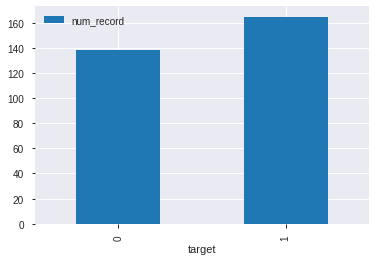

In [ ]:
result.plot(x='target', y='num_record', kind='bar')

In [ ]:
df['sex'].drop_duplicates()

0    1
2    0
Name: sex, dtype: int64

In [ ]:
result = df.groupby(['sex'], as_index=False) \
           .agg(num_rec = ('sex', 'count'))
result

,sex,num_rec
0,0,96
1,1,207


In [ ]:
result.num_rec.describe()

count      2.000000
mean     151.500000
std       78.488853
min       96.000000
25%      123.750000
50%      151.500000
75%      179.250000
max      207.000000
Name: num_rec, dtype: float64

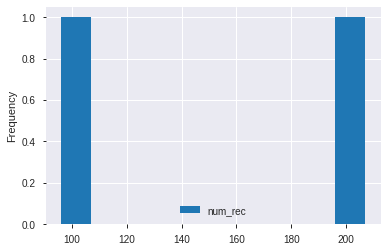

In [ ]:
result.plot(x='sex', y='num_rec', kind='hist')

In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

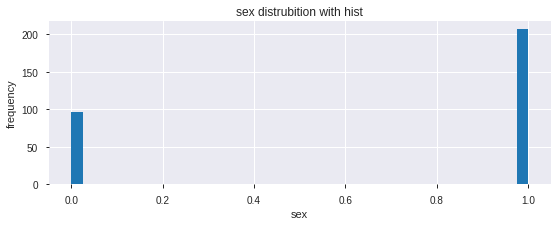

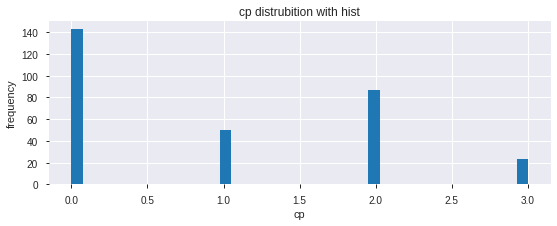

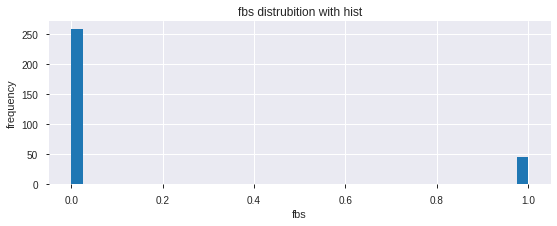

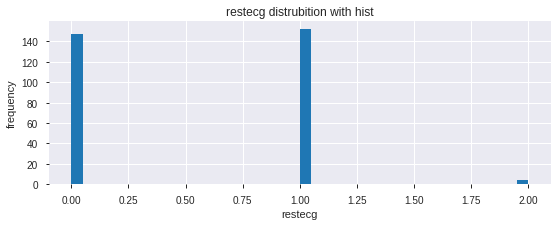

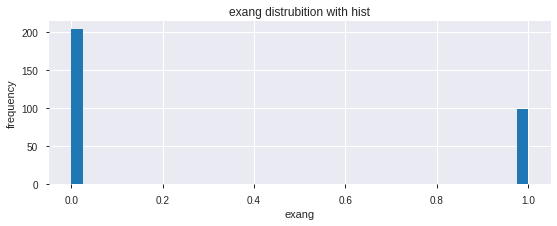

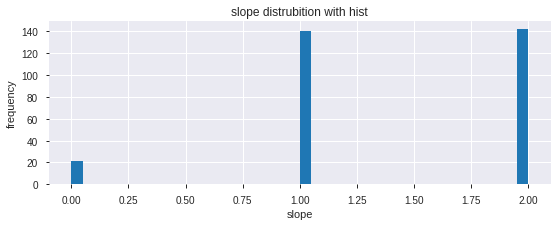

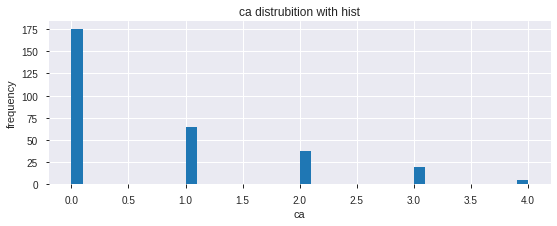

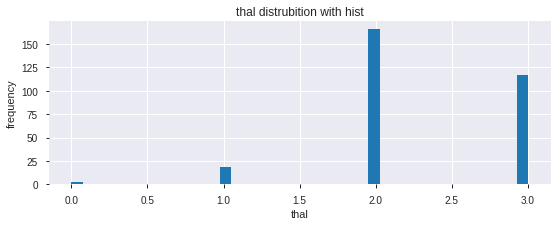

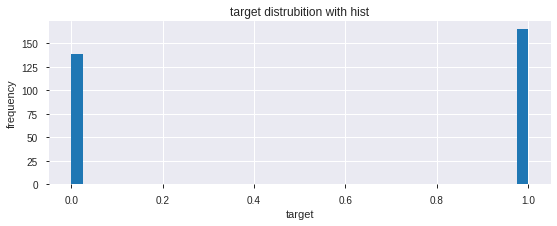

In [ ]:
categoricalVar = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for n in categoricalVar:
    plot_hist(n)

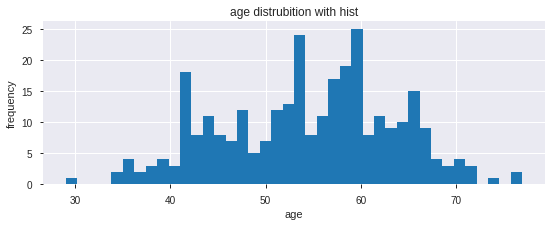

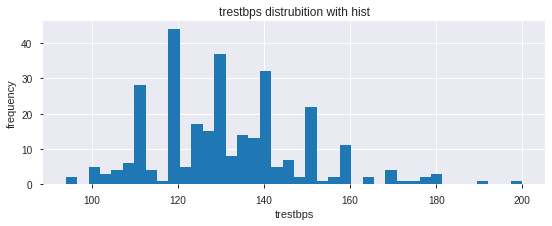

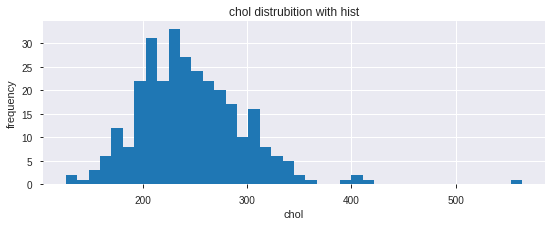

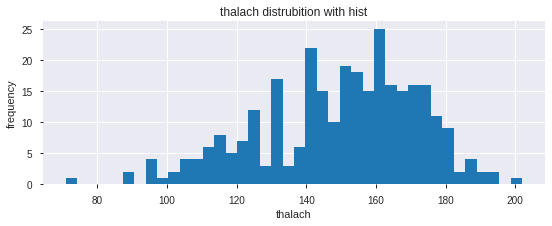

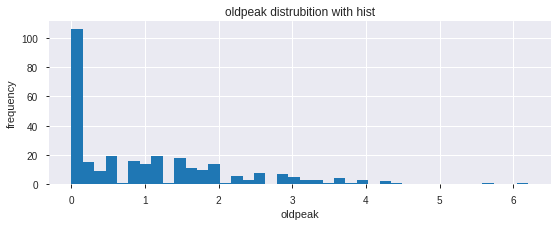

In [ ]:
numericVar = ["age","trestbps","chol","thalach","oldpeak"]
for n in numericVar:
    plot_hist(n)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

In [ ]:
#categoricalVar = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
#numericVar = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [77]:
features = df[['cp', 'thalach', 'slope' ]]
label = df[['target']]

In [79]:
features.head()

,cp,thalach,slope
0,3,150,0
1,2,187,0
2,1,172,2
3,1,178,2
4,0,163,2


In [80]:
features_train, features_test, label_train, label_test = train_test_split( features, label, test_size = 0.3, random_state = 100)

In [81]:
randomf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
randomf.fit(features_train, label_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [82]:
features_test.head(1)

,cp,thalach,slope
69,0,163,2


In [83]:
print(randomf.predict(features_test.head(1)))

[1]


In [84]:
label_pred = randomf.predict(features_test)
#label_pred.head()

AttributeError: ignored

In [85]:
pd.DataFrame(label_pred, columns = ['Prediction']).head()

,Prediction
0,1
1,0
2,1
3,1
4,1


In [86]:
print ("Accuracy score random forest: ", accuracy_score(label_test,label_pred)*100)

Accuracy score random forest:  72.52747252747253
